In [1]:
import numpy as np # linear algebra
import pandas as pd

In [17]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.Collecting networkx
     ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
      --------------------------------------- 0.0/1.6 MB 653.6 kB/s eta 0:00:03
     -- ------------------------------------- 0.1/1.6 MB 1.2 MB/s eta 0:00:02
     ---- ----------------------------------- 0.2/1.6 MB 1.4 MB/s eta 0:00:02
     ------- -------------------------------- 0.3/1.6 MB 1.6 MB/s eta 0:00:01
     ------------ --------------------------- 0.5/1.6 MB 2.2 MB/s eta 0:00:01
     ------------------- -------------------- 0.8/1.6 MB 2.9 MB/s eta 0:00:01
     -------------------------- ------------- 1.1/1.6 MB 3.3 MB/s eta 0:00:01
     ---------------------------------- ----- 1.4/1.6 MB 3.8 MB/s eta 0:00:01
     ---------------------------------------  1.6/1.6 MB 4.2 MB/s eta 0:00:01
     ---------------------------------------- 1.6/1.6 MB 3.9 MB/s eta 0:00:00




[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\acer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [18]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:
import plotly.express as px
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome 
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

In [19]:
phish_data = pd.read_csv('phishing_site_urls.csv')

In [20]:
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [21]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')#to getting alpha only

In [22]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [23]:
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[0]) # using first row

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [24]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 6.542412399780005 sec


In [25]:
phish_data.sample(5)

,URL,Label,text_tokenized
153566,btjunkie.org/torrent/Sarah-Mlynowski-Parties-a...,good,"[btjunkie, org, torrent, Sarah, Mlynowski, Par..."
375974,linkedin.com/pub/bernadette-brennan/11/656/436,good,"[linkedin, com, pub, bernadette, brennan]"
360336,imdb.com/title/tt0318462/reviews,good,"[imdb, com, title, tt, reviews]"
206889,lawyers.justia.com/lawyer/richard-paul-mccuske...,good,"[lawyers, justia, com, lawyer, richard, paul, ..."
49791,www.chandlermckaig.com/weddings.htm,good,"[www, chandlermckaig, com, weddings, htm]"


In [45]:
stemmer = SnowballStemmer("english") # choose a language

In [46]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 81.6428070999682 sec


In [47]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
25237,www.fubap.org/vladivostok/wp-includes/login1.html,bad,"[www, fubap, org, vladivostok, wp, includes, l...","[www, fubap, org, vladivostok, wp, includ, log...",www fubap org vladivostok wp includ login html
471777,youtube.com/watch?v=9B9ytMOYWM4,good,"[youtube, com, watch, v, B, ytMOYWM]","[youtub, com, watch, v, b, ytmoywm]",youtub com watch v b ytmoywm
141224,alabamalivenetwork.ning.com/profile/AlvinJacobs,good,"[alabamalivenetwork, ning, com, profile, Alvin...","[alabamalivenetwork, ning, com, profil, alvinj...",alabamalivenetwork ning com profil alvinjacob
154673,ca.linkedin.com/pub/daniel-garceau/1a/889/b09,good,"[ca, linkedin, com, pub, daniel, garceau, a, b]","[ca, linkedin, com, pub, daniel, garceau, a, b]",ca linkedin com pub daniel garceau a b
508731,stolefarsgnom.com/sl/gate.php,bad,"[stolefarsgnom, com, sl, gate, php]","[stolefarsgnom, com, sl, gate, php]",stolefarsgnom com sl gate php


In [48]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.6083186999894679 sec


In [40]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
495601,bei.com.br/2mrif1l,bad,"[bei, com, br, mrif, l]","[bei, com, br, mrif, l]",bei com br mrif l
47287,aleberts.net/PLO5XIde/webscr_prim.php?YWxlYmVy...,bad,"[aleberts, net, PLO, XIde, webscr, prim, php, ...","[alebert, net, plo, xide, webscr, prim, php, y...",alebert net plo xide webscr prim php ywxlymvyd...
477122,youtube.com/watch?v=mCJFqmxjuEw,good,"[youtube, com, watch, v, mCJFqmxjuEw]","[youtub, com, watch, v, mcjfqmxjuew]",youtub com watch v mcjfqmxjuew
169228,en.bestpicturesof.com/ponor,good,"[en, bestpicturesof, com, ponor]","[en, bestpicturesof, com, ponor]",en bestpicturesof com ponor
497234,use.losterosecohuerta.com.ar/scripts/main.js,bad,"[use, losterosecohuerta, com, ar, scripts, mai...","[use, losterosecohuerta, com, ar, script, main...",use losterosecohuerta com ar script main js


In [49]:
#sliceing classes
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [50]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [51]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

In [56]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask)
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud)
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off')
    plt.tight_layout()  
d = 'masks/masks-wordclouds/'

In [57]:
data = good_sites.text_stemmed
data.reset_index(drop=True, inplace=True)

In [59]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

In [60]:
cv = CountVectorizer()

In [61]:
help(CountVectorizer())

Help on CountVectorizer in module sklearn.feature_extraction.text object:

class CountVectorizer(_VectorizerMixin, sklearn.base.BaseEstimator)
 |  CountVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)
 |  
 |  Convert a collection of text documents to a matrix of token counts.
 |  
 |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.csr_matrix.
 |  
 |  If you do not provide an a-priori dictionary and you do not use an analyzer
 |  that does some kind of feature selection then the number of features will
 |  be equal to the vocabulary size found by analyzing the data.
 |  
 |  For an efficiency comparision of the different feature extractors, see
 |  :ref:`sphx_glr_

In [62]:
feature = cv.fit_transform(phish_data.text_sent)

In [63]:
feature[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [64]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

In [65]:
# create lr object
lr = LogisticRegression()

In [66]:
lr.fit(trainX,trainY)

LogisticRegression()

In [67]:
lr.score(testX,testY)

0.9635349541638452

In [68]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9774689387853178
Testing Accuracy : 0.9635349541638452

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.90      0.97      0.93     36698
        Good       0.99      0.96      0.97    100639

    accuracy                           0.96    137337
   macro avg       0.95      0.96      0.95    137337
weighted avg       0.97      0.96      0.96    137337


CONFUSION MATRIX


<Axes: >

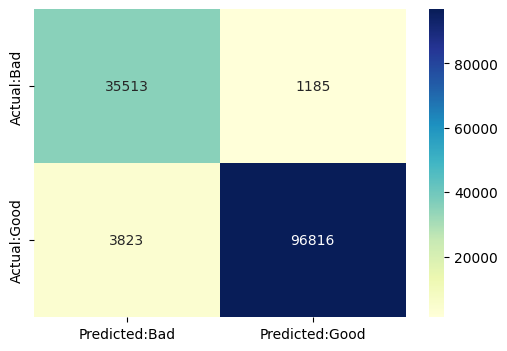

In [69]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [70]:
# create mnb object
mnb = MultinomialNB()

In [71]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [72]:
mnb.score(testX,testY)

0.957025419224244

In [73]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9741194973896201
Testing Accuracy : 0.957025419224244

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.94      0.92     38398
        Good       0.97      0.97      0.97     98939

    accuracy                           0.96    137337
   macro avg       0.94      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


<Axes: >

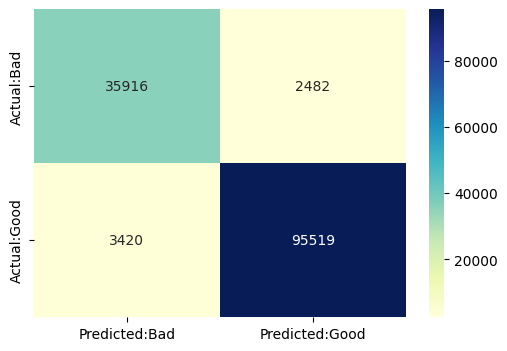

In [74]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [75]:
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(acc.index,acc.Accuracy)

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [76]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+)  -- these tolenizers giving me low accuray 

In [77]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [78]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [79]:
pipeline_ls.score(testX,testY) 

0.9679037695595506

Training Accuracy : 0.9811848770293853
Testing Accuracy : 0.9679037695595506

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.92      0.97      0.94     37122
        Good       0.99      0.97      0.98    100215

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<Axes: >

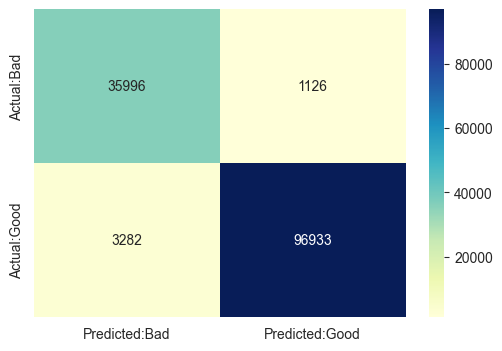

In [80]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [81]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [82]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9679037695595506


In [89]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good']
